In [ ]:
#vd2

In [ ]:
#bai tap tu thuc hanh 4
1.


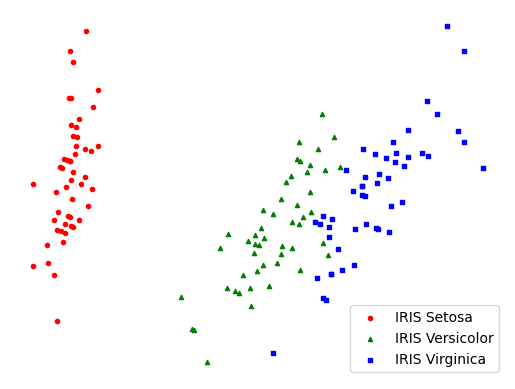

In [1]:
import pandas as pd
from sklearn.decomposition import PCA as sklearnPCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :4] # we take full 4 features
Y = iris.target
# Normalize data
X_norm = (X - X.min())/(X.max() - X.min())
pca = sklearnPCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(X_norm))
plt.axis("off")
plt.scatter(transformed[Y==0][0], transformed[Y==0][1], s=9, label='IRIS Setosa',c='red')
plt.scatter(transformed[Y==1][0], transformed[Y==1][1], s=9, label='IRIS Versicolor',c='green', marker="^")

plt.scatter(transformed[Y==2][0], transformed[Y==2][1], s=9, label='IRIS Virginica',c='blue', marker="s")
plt.legend()
plt.show()

In [ ]:
#2.
#Với đoạn chương trình đọc dữ liệu đã có, hãy chạy lại ví dụ này với các thư viện của gói linear_model, lớp LogisticRegression và so sánh kết quả.

In [10]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load and normalize data
X, y = load_iris(return_X_y=True)

# create objects to normalize data
scaler = StandardScaler()

# normalize X
X = scaler.fit_transform(X)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Train a logistic regression model
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)

# Make predictions and evaluate accuracy
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9777777777777777


In [2]:
#a) Chương trình tự xây dựng các hàm/phương thức từ thư viện cơ bản (bài tập tự thực hành 1):

In [3]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model

#chia theo tỉ lệ: train:validation = 4:1 (phân chia đều theo mỗi loại hoa)
X_train, X_test, y_train, y_test = train_test_split(X_norm, Y, test_size=0.2, random_state=42, stratify=Y)

linear_classifier = linear_model.LinearRegression()
linear_classifier.fit(X_train, y_train)
y_pred = linear_classifier.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix

np.round(y_pred)
print('Accuracy: ', accuracy_score(y_test, np.round(y_pred)))
print('Confusion matrix: \n', confusion_matrix(y_test, np.round(y_pred)))

Accuracy:  1.0
Confusion matrix: 
 [[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]


In [ ]:
#b) Chương trình Python với các hàm/phương thức từ thư viện Scikit-Learn

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
#from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
iris=load_iris()
# print(iris)
X=iris.data # Observed variable
Y=iris.target # Dependent variable (label)

#print(X.shape)
#print(Y.shape)
# Splitting Train and test Data
X_train,X_test,Y_train,Y_test=sklearn.model_selection.train_test_split(X,Y,test_size=0.2,
random_state=2)

#sc=StandardScaler()
#X_train=sc.fit_transform(X_train)
#X_test=sc.transform(X_test)
# Call to Logistic Regression Model - SAG: solving is based on Stochastic Average Gradient
lorg=LogisticRegression(multi_class='multinomial',solver='sag', max_iter=5000)
# and train model by Training Dataset
lorg.fit(X_train,Y_train)
# Then Predict the Test data
Y_pred=lorg.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix
print('Accuracy: ', accuracy_score(Y_test, Y_pred))
print('Confusion Matrix: \n', confusion_matrix(Y_test, Y_pred))

Accuracy:  0.9666666666666667
Confusion Matrix: 
 [[14  0  0]
 [ 0  7  1]
 [ 0  0  8]]


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
#from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
iris=load_iris()
# print(iris)
X=iris.data # Observed variable
Y=iris.target # Dependent variable (label)
#print(X.shape)
#print(Y.shape)
# Splitting Train and test Data
X_train,X_test,Y_train,Y_test=sklearn.model_selection.train_test_split(X,Y,test_size=0.2,
random_state=2)

# sc = StandardScaler()
# X_train=sc.fit_transform(X_train)
# X_test=sc.transform(X_test)
# Call to Logistic Regression Model - SAG: solving is based on Stochastic Average Gradient
lorg=LogisticRegression(multi_class='multinomial',solver='sag', max_iter=5000)
# and train model by Training Dataset
lorg.fit(X_train,Y_train)
# Then Predict the Test data
Y_pred=lorg.predict(X_test)
# for accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test,Y_pred))
# for confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,Y_pred)
print(cm)

#
logrec = LogisticRegression()
A = logrec.fit(X_train, Y_train)
Y_predict = logrec.predict(X_test)
print(Y_predict)


0.9666666666666667
[[14  0  0]
 [ 0  7  1]
 [ 0  0  8]]
[0 0 2 0 0 2 0 2 2 0 0 0 0 0 1 1 0 1 2 1 2 1 2 1 1 0 0 2 0 2]


In [ ]:
Ví dụ 3 (Bài tập tự thực hành 2)

In [6]:
import sklearn
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_20newsgroups_vectorized
n_samples = 20000
X, y = fetch_20newsgroups_vectorized(subset='all', return_X_y=True)
X = X[:n_samples]
y = y[:n_samples]
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, random_state=42,stratify=y, test_size=0.1)

train_samples, n_features = X_train.shape
n_classes = np.unique(y).shape[0]

In [8]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import linear_model

LogReg = linear_model.LogisticRegression(solver='sag', multi_class='multinomial', max_iter=10000)
LogReg.fit(X_train, y_train)
y_pred = LogReg.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))

Accuracy:  0.823342175066313
Confusion Matrix: 
 [[68  0  0  0  0  0  0  0  0  1  0  1  0  1  0  4  0  2  0  3]
 [ 0 79  3  1  0  5  2  0  0  0  0  1  1  1  1  1  0  1  0  1]
 [ 0  5 78  6  1  4  2  0  1  0  0  0  1  0  1  0  0  0  0  0]
 [ 0  4  8 67  4  1  4  1  1  0  0  1  3  2  0  0  0  1  1  0]
 [ 0  3  2  8 74  1  2  0  0  0  0  0  3  0  0  1  1  1  0  0]
 [ 0  4  7  3  1 81  0  1  1  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  2  2  2 82  4  0  1  1  1  1  1  0  1  0  0  0  0]
 [ 0  1  0  0  0  0  2 92  0  0  0  0  1  2  1  0  0  0  0  0]
 [ 0  0  0  0  1  0  3  6 86  1  0  0  0  1  1  0  0  0  1  0]
 [ 0  1  0  1  0  1  2  0  0 87  4  0  0  3  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  4  0  0  3 92  0  0  0  0  0  0  0  1  0]
 [ 0  2  0  1  1  4  2  0  1  2  1 82  0  0  0  0  2  1  0  0]
 [ 0  4  0  1  1  1  2  4  0  0  0  0 84  0  1  0  0  0  0  0]
 [ 0  1  0  0  0  0  3  3  2  1  0  1  1 80  3  1  0  2  1  0]
 [ 1  1  0  0  1  2  2  0  0  0  0  0  0  3 88  1  0  0  0  0]
 [ 2  

In [7]:
#vd4

In [9]:
from matplotlib import pyplot as plt
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)

# change file_data to where did you put it!
file_data = 'glass.csv'
glass_df = pd.read_csv(file_data)
print(glass_df.info())
glass_types = glass_df['Type'].unique()
print(glass_types)
print(glass_df['Type'].value_counts())
X_1 = glass_df[glass_df.columns[:-1]]
y_1 = glass_df['Type']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_1, y_1, test_size=0.25, random_state=42)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

logisticRegr = LogisticRegression(max_iter=10000,solver='sag',multi_class='multinomial')
logisticRegr.fit(X_train, y_train)
predictions = logisticRegr.predict(X_test)
print('Predictions: ', predictions)

# so sánh với dữ liệu gốc để đưa ra độ chính xác, ma trận confusion matrix.
score = logisticRegr.score(X_test, y_test)
print('Accuracy: ', score)
table = pd.crosstab(y_test, predictions, rownames=['Actual'], colnames=['Predicted'])
print('Confusion matrix: \n', table)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id_Number  214 non-null    int64  
 1   RI         214 non-null    float64
 2   Na         214 non-null    float64
 3   Mg         214 non-null    float64
 4   Al         214 non-null    float64
 5   Si         214 non-null    float64
 6   K          214 non-null    float64
 7   Ca         214 non-null    float64
 8   Ba         214 non-null    float64
 9   Fe         214 non-null    float64
 10  Type       214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB
None
[1 2 3 5 6 7]
2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64
Predictions:  [1 7 1 7 2 2 1 2 2 2 6 5 2 2 6 5 7 1 1 6 2 7 7 7 3 2 1 1 5 1 1 2 3 2 1 7 5
 3 2 2 2 7 1 2 3 2 2 2 2 2 1 1 1 2]
Accuracy:  1.0
Confusion matrix: 
 Predicted   1   2  3  5  6  7
Actual                       
1          1

In [ ]:
#vd4
'''
1.Đoạn code đọc tệp dữ liệu, giải nén và chuyển các đoạn ứng với mỗi ảnh sang một ma trận số:
    Khai báo thư viện và đường dẫn đến tệp dữ liệu. Cần sửa đường dẫn này đến vị trí đặt dữ liệu cụ thể.
'''

In [1]:
import os
import numpy as np
# set names to the paths because they're too long
data_path = 'C:\\Users\\TGDD\\Desktop\\học máy\\week4\\image data'
# train path
train_images_path = os.path.join(data_path, 'train-images-idx3-ubyte.gz')
train_labels_path = os.path.join(data_path, 'train-labels-idx1-ubyte.gz')
# test path
test_images_path = os.path.join(data_path, 't10k-images-idx3-ubyte.gz')
test_labels_path = os.path.join(data_path, 't10k-labels-idx1-ubyte.gz')

In [ ]:
#Xây dựng phương thức đọc dữ liệu từ tệp gzip, giải nén và đưa về định dạng là một dãy ảnh (một dãy ma trận nguyên)

In [2]:
def get_mnist_data(images_path, labels_path, num_images, shuffle=False, _is=True, image_size=28):
    """
This shuffle param is active when .gz is downloaded at:
- 'http://yann.lecun.com/exdb/mnist/'
- This function return random num_images in 60000 or 10000
    """
    # read data
    import gzip  # to decompress gz (zip) file

    # open file training to read training data
    f_images = gzip.open(images_path,'r')

    # skip 16 first bytes because these are not data, only header infor
    f_images.read(16)

    # general: read num_images data samples if this parameter is set;
    # if not, read all (60000 training or 10000 test)
    real_num = num_images if not shuffle else (60000 if _is else 10000)

    # read all data to buf_images (28x28xreal_num)
    buf_images = f_images.read(image_size * image_size * real_num)

    # images
    images = np.frombuffer(buf_images, dtype=np.uint8).astype(np.float32)
    images = images.reshape(real_num, image_size, image_size,)

    # Read labels
    f_labels = gzip.open(labels_path,'r')
    f_labels.read(8)
    labels = np.zeros((real_num)).astype(np.int64)

    # rearrange to correspond the images and labels
    for i in range(0, real_num):
        buf_labels = f_labels.read(1)
        labels[i] = np.frombuffer(buf_labels, dtype=np.uint8).astype(np.int64)

    # shuffle to get random images data
    if shuffle is True:
        rand_id = np.random.randint(real_num, size=num_images)

        images = images[rand_id, :]
        labels = labels[rand_id,]

    # change images data to type of vector 28x28 dimentional
    images = images.reshape(num_images, image_size * image_size)
    return images, labels

In [ ]:
#Gọi phương thức đọc dữ liệu để kiếm tra xem đọc đúng hay không:

In [3]:
train_images, train_labels = get_mnist_data(train_images_path, train_labels_path, 5000, shuffle=True)
test_images, test_labels = get_mnist_data(test_images_path, test_labels_path, 10000, _is=False, shuffle=True)
print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)

(5000, 784) (5000,)
(10000, 784) (10000,)


In [ ]:
#Đoạn chương trình chứa các phương thức tự xây dựng cho hồi quy logistic nhiều lớp đã có từ Ví dụ 1

In [4]:
# Convert matrix to image
def get_image(image):
    return image.reshape(28, 28)

# These methods are from Vi du 1
def convert_labels(y, C):
    from scipy import sparse
    Y = sparse.coo_matrix((np.ones_like(y),(y, np.arange(len(y)))), shape = (C, len(y))).toarray()
    return Y

def softmax(Z):
    e_Z = np.exp(Z)
    A = e_Z / e_Z.sum(axis = 0)
    return A

def softmax_stable(Z):
    e_Z = np.exp(Z - np.max(Z, axis = 0, keepdims = True))
    A = e_Z / e_Z.sum(axis = 0)
    return A

def pred(W, X):
    A = softmax_stable(W.T.dot(X))
    return np.argmax(A, axis = 0)

In [ ]:
#Đoạn chương trình chứa thủ tục tính toán theo phương pháp lặp Gradient Descent ngẫu nhiên trong mô hình hồi quy logistic cho dữ liệu nhiều lớp.

In [5]:
def _softmax_regression(X, Y, theta, lambda_=0.5,iterations=20, learning_rate=1e-5, batch_size=200):
    from sklearn.metrics import log_loss

    losses = []
    _theta = theta
    d, N = X.shape

    for iter_ in range(iterations):
        shuffle_index = np.random.permutation(N)
        for i in shuffle_index:
            xi = X[:, i].reshape(d, 1)
        yi = Y[:, i].reshape(10, 1)
        ai = softmax_stable(np.dot(_theta.T, xi))
        _theta += learning_rate * xi.dot((yi - ai).T)
        if (iter_ * N + i) % batch_size == 0:
            Y_hat = np.dot(_theta.T, X)
            losses.append(log_loss(Y, Y_hat))
            
        Y_hat = np.dot(_theta.T, X)
        print(f"epoch {iter_} - cost {log_loss(Y, Y_hat) / N}")
    return _theta, losses

In [ ]:
#In thử một vài ảnh để kiểm tra dữ liệu

9 4


<Figure size 640x480 with 0 Axes>

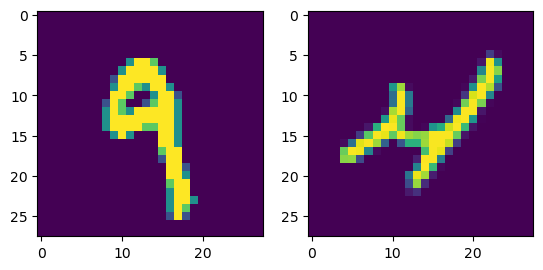

In [6]:
# for display and test digit :D
import random
import matplotlib.pyplot as plt
index = random.randint(0, 1000)
print(train_labels[index], test_labels[index])
train_image = np.asarray(get_image(train_images[index])).squeeze()
test_image = np.asarray(get_image(test_images[index])).squeeze()
plt.figure()

#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1, 2)

# use the created array to output your multiple images. In this case I have stacked 4 images vertically
axarr[0].imshow(train_image)
axarr[1].imshow(test_image)
plt.show()

In [ ]:
#Chuẩn bị dữ liệu huấn luyện

(785, 5000)
(10, 5000)


<Figure size 640x480 with 0 Axes>

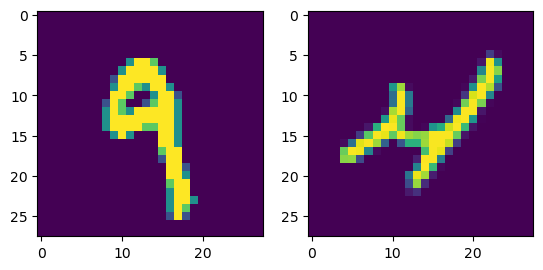

In [7]:
X_train = np.concatenate((np.ones((1, train_images.shape[0])), train_images.T), axis = 0)

Y_train = convert_labels(train_labels, 10)
print(X_train.shape)
print(Y_train.shape)
train_image = np.asarray(get_image(train_images[index])).squeeze()
test_image = np.asarray(get_image(test_images[index])).squeeze()
plt.figure()
#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1, 2)
# use the created array to output your multiple images. In this case I have stacked 4 images vertically
axarr[0].imshow(train_image)
axarr[1].imshow(test_image)
plt.show()

In [ ]:
#Chạy quá trình training và in ra loss function

In [8]:
theta = np.zeros((X_train.shape[0], 10))

opt_theta, losses = _softmax_regression(X_train, Y_train, theta)
print('training success: ', opt_theta.shape, len(losses))

epoch 0 - cost 0.8517193191416238
epoch 1 - cost 1.0890656900209066
epoch 2 - cost 0.9274807699602399
epoch 3 - cost 1.130563404940529
epoch 4 - cost 1.3026365593776823
epoch 5 - cost 1.3805952629923326
epoch 6 - cost 1.3026782767969405
epoch 7 - cost 1.581510316816399
epoch 8 - cost 1.3166259364151705
epoch 9 - cost 1.31663810700508
epoch 10 - cost 1.3134273591549583
epoch 11 - cost 1.4025139107490032
epoch 12 - cost 1.4203471287084772
epoch 13 - cost 1.4153308976847587
epoch 14 - cost 1.3668300389312058
epoch 15 - cost 1.3668442917315042
epoch 16 - cost 1.3668442917315125
epoch 17 - cost 1.6198502429573989
epoch 18 - cost 1.6108489372748207
epoch 19 - cost 1.4061550890050067
training success:  (785, 10) 0


In [ ]:
#Tính các thông số về độ chính xác (gọi thư viện để chương trình không quá dài)

In [9]:
from sklearn.metrics import accuracy_score
print('accuracy training data: ', accuracy_score(train_labels, pred(opt_theta, X_train)))

# test_images, test_labels = get_mnist_data(
# test_images_path, test_labels_path, 1000, _is=False, shuffle=False)
X_test = np.concatenate((np.ones((1, test_images.shape[0])), test_images.T), axis = 0)

print(X_test.shape)
print('accuracy testing data: ', accuracy_score(test_labels, pred(opt_theta, X_test)))

accuracy training data:  0.3142
(785, 10000)
accuracy testing data:  0.3149
